In [1]:
import sys
#sys.path.insert(0, '/Users/qd/PycharmProjects/rydanalysis/')
from rydanalysis import *
import matplotlib.pyplot as plt
import importlib
#path='/run/user/1000/gvfs/smb-share:server=axion.local,share=rydberg/data/2020_02_12/EIT_resonancescan'
import seaborn as sns
from pathlib import Path
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
path='/Users/qd/Desktop/DATA/01_IEI_pABSx0-8_pBlueR3-6-5_pBlueR2_9_tEXCz/'
path = Path(path)

In [2]:
seq = rydanalysis.OldStructure(path)
#seq.path='/Users/qd/Schreibtisch/DATA/'

'raw_data.h5' already exists. Do you want to load from this file (Y) or from the old folder structure (N)? [Y/n]: couldn't read 2020_07_13_18.45.42_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_18.45.52_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_18.46.07_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_18.46.17_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.46.40_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.46.50_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.48.10_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.48.20_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.48.47_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.48.57_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.49.29_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.49.39_ERROR.txt. Skipping this file...
couldn't read 2020_07_13_23.50.35_ERROR.txt. Skipping this file...
couldn't read 2

In [3]:
seq.save_raw_data()

C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\l

5
5
1900
13


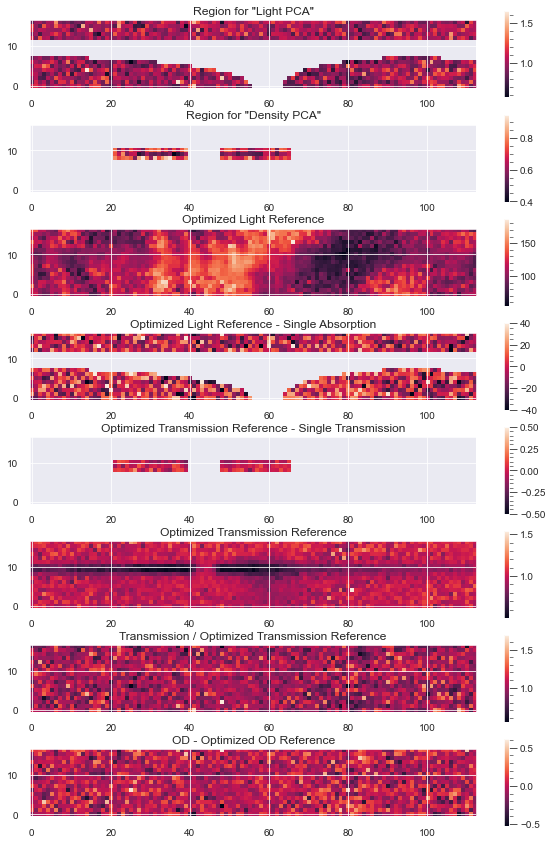

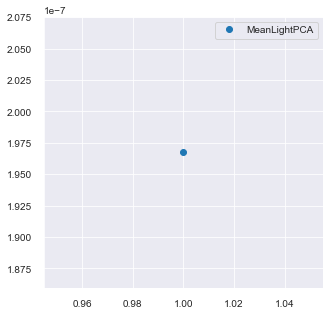

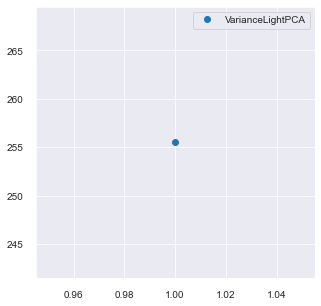

'for ncomp in [11,12,13,14]:\n    exc=dict(tEXC=0.0001)\n    IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,\n                                             absorption_ref_kwargs=dict(tEXC=0),\n                                             pca_kwargs=dict(n_components=10),pca_density_kwargs=dict(n_components=ncomp))\n    trans=IEI.transmission#.groupby(\'tEXC\').mean(\'shot\')\n    deltatrans=IEI.transmission_ratio\n    deltaod=IEI.delta_optical_depth\n    ref=IEI.transmission_reference\n    opt_ref=IEI.optimized_transmission_reference(IEI.transmission)\n    single=IEI.absorption_images\n    light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference\n    density_ref=IEI.optimized_transmission_reference(IEI.transmission)\n\n    fig,ax = plt.subplots(8,figsize=(10,15))\n    pic=0\n    #ax[pic].set_title(\'Single Shot"\')\n    #ax[pic].imshow(single[n], origin=\'bottom\')\n    #fig.colorbar(ax[pic].i

In [38]:
importlib.reload(rydanalysis)
from rydanalysis import *
from scipy import stats
import seaborn as sns
from pylab import rcParams
data = seq.raw_data



elliptical = (EllipticalMask(image = data.image_01).get_mask(center_x=-50,center_y=-520,width_x=60,width_y=450) +
                   RectangularMask(image = data.image_01).get_mask(center_x=82,center_y=0, width_x=35, width_y=1000) +#EllipticalMask(image = data.image_01).get_mask(center_x=82,center_y=-350,width_x=40,width_y=450) +
                   EllipticalMask(image = data.image_01).get_mask(center_x=-50,center_y=280,width_x=60,width_y=280)  #EllipticalMask(image = data.image_01).get_mask(center_x=82,center_y=310,width_x=40,width_y=300)
                   )/3

roi =~ (EllipticalMask(image = data.image_01).get_mask(center_x=-50,center_y=-520,width_x=60,width_y=450) +
        RectangularMask(image = data.image_01).get_mask(center_x=82,center_y=0, width_x=35, width_y=1000) +#EllipticalMask(image = data.image_01).get_mask(center_x=82,center_y=-350,width_x=40,width_y=450) +
        EllipticalMask(image = data.image_01).get_mask(center_x=-50,center_y=280,width_x=60,width_y=280) +
        EllipticalMask(image = data.image_01).get_mask(center_x=30,center_y=-168,width_x=15,width_y=50))/4

two_level=(RectangularMask(image = data.image_01).get_mask(center_x=26,center_y=-290, width_x=14, width_y=80)
          + RectangularMask(image = data.image_01).get_mask(center_x=26,center_y=-60, width_x=14, width_y=80))/2

crop = RectangularMask(image = data.image_01).get_mask(center_x=18,center_y=-175, width_x=70, width_y=600)

IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,
                                             absorption_ref_kwargs=dict(tEXC=0),
                                             pca_kwargs=dict(n_components=5),pca_density_kwargs=dict(n_components=5))

trans=IEI.transmission
deltatrans=IEI.transmission_ratio
deltaod=IEI.delta_optical_depth
ref=IEI.transmission_reference
opt_ref=IEI.optimized_transmission_reference(IEI.transmission)
single=IEI.absorption_images
light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference
density_ref=IEI.optimized_transmission_reference(IEI.transmission)


n=1
meanlist=[]
varlist=[]
meanlistd=[]
varlistd=[]
#for texc in [0.0001,0.0002,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012,0.0013,0.0014,
            # 0.0015,0.0016,0.0017,0.0018,0.0019,0.0020]:
for ncomp in [1900]:
    exc=dict(tEXC=0.0001)
    IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,
                                             absorption_ref_kwargs=dict(tEXC=0),
                                             pca_kwargs=dict(n_components=ncomp),pca_density_kwargs=dict(n_components=13))

    trans=IEI.transmission
    deltatrans=IEI.transmission_ratio
    deltaod=IEI.delta_optical_depth
    ref=IEI.transmission_reference
    opt_ref=IEI.optimized_transmission_reference(IEI.transmission)
    single=IEI.absorption_images
    light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference
    density_ref=IEI.optimized_transmission_reference(IEI.transmission)

    fig,ax = plt.subplots(8,figsize=(10,15))
    pic=0
    #ax[pic].set_title('Single Shot"')
    #ax[pic].imshow(single[n], origin='bottom')
    #fig.colorbar(ax[pic].imshow(single[n], origin='bottom'),ax=ax[pic])
    #pic+=1
    ax[pic].set_title('Region for "Light PCA"')
    ax[pic].imshow(trans.sel(exc)[n].where(elliptical), origin='bottom')
    fig.colorbar(ax[pic].imshow(trans.sel(exc)[n].where(elliptical), origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Region for "Density PCA"')
    ax[pic].imshow(trans.sel(exc)[n].where(two_level), origin='bottom')
    fig.colorbar(ax[pic].imshow(trans.sel(exc)[n].where(two_level), origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Optimized Light Reference')
    ax[pic].imshow(light_ref.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(light_ref.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    diff=light_ref.sel(exc)[n].where(elliptical)-single.sel(exc)[n].where(elliptical)
    ax[pic].set_title('Optimized Light Reference - Single Absorption')
    ax[pic].imshow(diff, vmin=-40,vmax=40, origin='bottom')
    fig.colorbar(ax[pic].imshow(diff, vmin=-40,vmax=40, origin='bottom'),ax=ax[pic])
    pic+=1
    meanlist.append(float(diff.mean()))
    varlist.append(float(diff.var()))
    #print("Mean of Reference -Single Absorption : ",float(diff.mean()))
    #print("Standard Deviation of Reference -Single Absorption : ",float(diff.var()))
    diff=density_ref.sel(exc)[n].where(two_level)-trans.sel(exc)[n].where(two_level)
    ax[pic].set_title('Optimized Transmission Reference - Single Transmission')
    ax[pic].imshow(diff, vmin=-0.5,vmax=0.5,  origin='bottom')
    fig.colorbar(ax[pic].imshow(diff, vmin=-0.5,vmax=0.5,origin='bottom'),ax=ax[pic])
    pic+=1
    #meanlistd.append(float(diff.mean()))
    #varlistd.append(float(diff.var()))
    #print("Mean of Reference -Single Absorption : ",float(diff.mean()))
    #print("Standard Deviation of Reference -Single Absorption : ",float(diff.var()))
    ax[pic].set_title('Optimized Transmission Reference')
    ax[pic].imshow(opt_ref.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(opt_ref.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Transmission / Optimized Transmission Reference')
    ax[pic].imshow(deltatrans.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(deltatrans.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('OD - Optimized OD Reference')
    ax[pic].imshow(deltaod.sel(exc)[n],vmin=0, vmax=1, origin='bottom')
    fig.colorbar(ax[pic].imshow(deltaod.sel(exc)[n], origin='bottom'),ax=ax[pic])
    #plt.show()

plt.show()
fig,ax = plt.subplots(1,figsize=(5,5))
ax.plot([1],meanlist,linestyle='',marker='o',label="MeanLightPCA")
plt.legend()
#plt.xlabel("n-components")
plt.savefig('/Users/qd/Desktop/DATA/MeanLightPCA2.png')
plt.show()
fig,ax = plt.subplots(1,figsize=(5,5))
ax.plot([1],varlist,linestyle='',marker='o',label="VarianceLightPCA")
plt.legend()
#plt.xlabel("n-components")
plt.savefig('/Users/qd/Desktop/DATA/VarLightPCA2.png')
plt.show()


'''for ncomp in [11,12,13,14]:
    exc=dict(tEXC=0.0001)
    IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,
                                             absorption_ref_kwargs=dict(tEXC=0),
                                             pca_kwargs=dict(n_components=10),pca_density_kwargs=dict(n_components=ncomp))
    trans=IEI.transmission#.groupby('tEXC').mean('shot')
    deltatrans=IEI.transmission_ratio
    deltaod=IEI.delta_optical_depth
    ref=IEI.transmission_reference
    opt_ref=IEI.optimized_transmission_reference(IEI.transmission)
    single=IEI.absorption_images
    light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference
    density_ref=IEI.optimized_transmission_reference(IEI.transmission)

    fig,ax = plt.subplots(8,figsize=(10,15))
    pic=0
    #ax[pic].set_title('Single Shot"')
    #ax[pic].imshow(single[n], origin='bottom')
    #fig.colorbar(ax[pic].imshow(single[n], origin='bottom'),ax=ax[pic])
    #pic+=1
    ax[pic].set_title('Region for "Light PCA"')
    ax[pic].imshow(trans.sel(exc)[n].where(elliptical), origin='bottom')
    fig.colorbar(ax[pic].imshow(trans.sel(exc)[n].where(elliptical), origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Region for "Density PCA"')
    ax[pic].imshow(trans.sel(exc)[n].where(two_level), origin='bottom')
    fig.colorbar(ax[pic].imshow(trans.sel(exc)[n].where(two_level), origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Optimized Light Reference')
    ax[pic].imshow(light_ref.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(light_ref.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    diff=light_ref.sel(exc)[n].where(elliptical)-single.sel(exc)[n].where(elliptical)
    ax[pic].set_title('Optimized Light Reference - Single Absorption')
    ax[pic].imshow(diff, vmin=-40,vmax=40, origin='bottom')
    fig.colorbar(ax[pic].imshow(diff, vmin=-40,vmax=40, origin='bottom'),ax=ax[pic])
    pic+=1
    #meanlist.append(float(diff.mean()))
    #varlist.append(float(diff.var()))
    #print("Mean of Reference -Single Absorption : ",float(diff.mean()))
    #print("Standard Deviation of Reference -Single Absorption : ",float(diff.var()))
    diff=density_ref.sel(exc)[n].where(two_level)-trans.sel(exc)[n].where(two_level)
    ax[pic].set_title('Optimized Transmission Reference - Single Transmission')
    ax[pic].imshow(diff, vmin=-0.5,vmax=0.5,  origin='bottom')
    fig.colorbar(ax[pic].imshow(diff, vmin=-0.5,vmax=0.5,origin='bottom'),ax=ax[pic])
    pic+=1
    meanlistd.append(float(diff.mean()))
    varlistd.append(float(diff.var()))
    #print("Mean of Reference -Single Absorption : ",float(diff.mean()))
    #print("Standard Deviation of Reference -Single Absorption : ",float(diff.var()))
    ax[pic].set_title('Optimized Transmission Reference')
    ax[pic].imshow(opt_ref.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(opt_ref.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Transmission / Optimized Transmission Reference')
    ax[pic].imshow(deltatrans.sel(exc)[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(deltatrans.sel(exc)[n], origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('OD - Optimized OD Reference')
    ax[pic].imshow(deltaod.sel(exc)[n],vmin=0, vmax=1, origin='bottom')
    fig.colorbar(ax[pic].imshow(deltaod.sel(exc)[n], origin='bottom'),ax=ax[pic])
    #plt.show()


plt.show()
fig,ax = plt.subplots(1,figsize=(5,5))
ax.plot([11,12,13,14],meanlistd,linestyle='',marker='o',label="MeanDensityPCA")
plt.legend()
#plt.xlabel("n-components")
plt.savefig('/Users/qd/Desktop/DATA/MeanDensityPCA2.png')
plt.show()
fig,ax = plt.subplots(1,figsize=(5,5))
ax.plot([11,12,13,14],varlistd,linestyle='',marker='o',label="VarDensityPCA")
#plt.xlabel("n-components")
#plt.ylabel('')
plt.legend()
plt.savefig('/Users/qd/Desktop/DATA/VarDensityPCA2.png')
plt.show()'''

C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\computation.py:604: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


1900
13
0.046239305
0.030811874
0.15898734
0.06493611
0.31250077
0.21516438
0.53896487
0.3893425
0.73175
0.48566383
0.9636665
0.5818839
1.0056608
0.6500121
1.1651634
0.78295225
1.3968527
0.90281475
1.4969147
0.90314674
1.6426166
1.121902
1.707862
0.98036337
1.6557488
1.0927973
1.7346146
1.0982282
1.8435438
1.1250834
1.9006035
1.2435172
1.8597469
1.2472676
1.9114361
1.1465222
1.827664
1.1884824
2.0280166
1.1254939


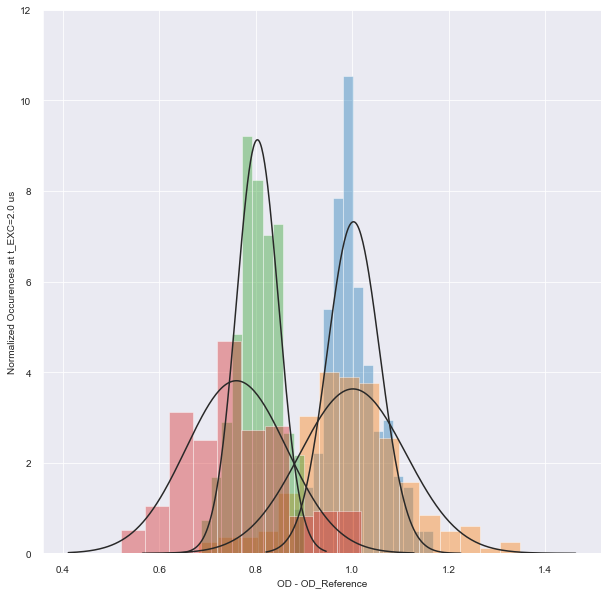

In [35]:
rcParams['figure.figsize'] = 10, 10

eit=dict(tEXC=0)
blocked=dict(tEXC=0.004)

IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=two_level,crop_mask=crop,
                                             absorption_ref_kwargs=dict(tEXC=0),
                                             pca_kwargs=dict(n_components=1900),pca_density_kwargs=dict(n_components=13))


trans=IEI.transmission
deltatrans=IEI.transmission_ratio
deltaod=IEI.delta_optical_depth
ref=IEI.transmission_reference
opt_ref=IEI.optimized_transmission_reference(IEI.transmission)
single=IEI.absorption_images
light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference
density_ref=IEI.optimized_transmission_reference(IEI.transmission)

eitlist=[]
eitlist1=[]

for n in range(0,197):
    eitlist.append(deltatrans.sel(eit)[n][9:11,42:46].mean())
    eitlist1.append(deltatrans.sel(eit)[n][9,43])


meaneit=stats.norm.fit(eitlist)[0]
noiseeit=stats.norm.fit(eitlist)[1]
meaneit1=stats.norm.fit(eitlist1)[0]
noiseeit1=stats.norm.fit(eitlist1)[1]

signallist=[]
noiselist=[]
snrlist=[]
signallist1=[]
noiselist1=[]
snrlist1=[]

for texc in [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012,0.0013,0.0014,
             0.0015,0.0016,0.0017,0.0018,0.0019,0.0020]:
    blocked=dict(tEXC=texc)
    for y in range(0,1):
        for x in range(0,1):
            odlist=[]
            odlist1=[]
            for n in range(0,193):
                #singlelist.append(single.sel(eit)[n].where(roi)[15+y,44+x]*1.37)
                #singlelist1.append(single.sel(blocked)[n].where(roi)[15+y,44+x]*1.37)
                #odlist.append(deltaod.sel(eit)[n].where(roi)[9+y,43+x])
                odlist.append(deltatrans.sel(blocked)[n][9:11,42:46].mean())
                odlist1.append(deltatrans.sel(blocked)[n][9,43])
                #odlist2.append(delta_t_norm.sel(eit)[n].where(roi)[8+y,44+x])
                #odlist3.append(delta_t_norm.sel(blocked)[n].where(roi)[8+y,44+x])
            try:
                #print(stats.norm.fit(singlelist))
                #print(stats.norm.fit(singlelist1))
                #sns.distplot(singlelist, fit=stats.norm, kde=False)
                #sns.distplot(singlelist1, fit=stats.norm, kde=False)
                #plt.ylabel('Occurences at y=%.0f , x=%.0f' %(y,x))
                #plt.xlabel('Counts')
                #plt.show()
                signal=np.abs(stats.norm.fit(odlist)[0]-meaneit)
                noise=stats.norm.fit(odlist)[1]+noiseeit
                print(signal/noise)
                signallist.append(signal)
                noiselist.append(noise)
                snrlist.append(signal/noise)

                signal1=np.abs(stats.norm.fit(odlist1)[0]-meaneit1)
                noise1=stats.norm.fit(odlist1)[1]+noiseeit1
                print(signal1/noise1)
                signallist1.append(signal1)
                noiselist1.append(noise1)
                snrlist1.append(signal1/noise1)
                #print(signal/noise)
                #print(stats.norm.fit(odlist2))
                #print(stats.norm.fit(odlist3))
                plt.clf()
                sns.distplot(eitlist, fit=stats.norm, kde=False)
                sns.distplot(eitlist1, fit=stats.norm, kde=False)
                sns.distplot(odlist, fit=stats.norm, kde=False)
                sns.distplot(odlist1, fit=stats.norm, kde=False)
                #sns.distplot(odlist2, fit=stats.norm, kde=False)
                #sns.distplot(odlist3, fit=stats.norm, kde=False)
                texc=texc*1000
                plt.xlabel('OD - OD_Reference')
                #plt.xlim(-0.3,0.6)
                plt.ylim(0,12)
                plt.ylabel('Normalized Occurences at t_EXC=%.1f us' %texc)# at y=%.0f , x=%.0f' %(y,x))
                #plt.show()
                plt.savefig('/Users/qd/Desktop/DATA/t_EXC=%.1f us.png' %texc)
            except:
                print('Out of ROI with x:',x,'y:',y)



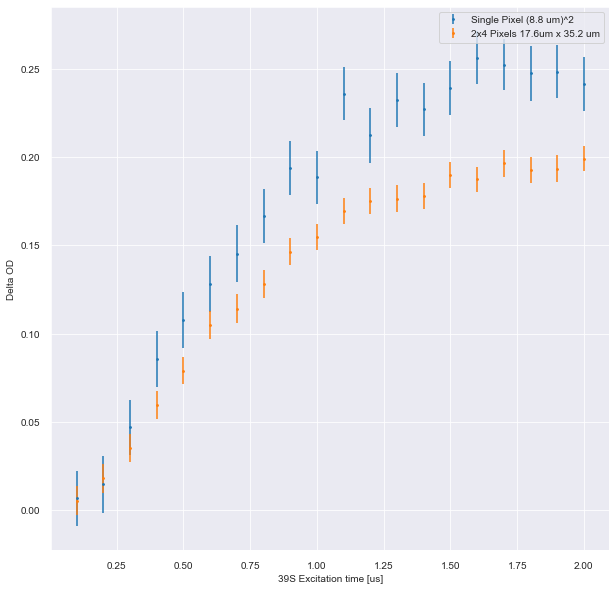

In [36]:
plt.errorbar(np.linspace(0.1,2,20),signallist1,noiselist1/np.sqrt(193),linestyle='',marker='o',markersize=1.8,label="Single Pixel (8.8 um)^2 ")
plt.xlabel("39S Excitation time [us]")
plt.ylabel('Delta OD')
plt.errorbar(np.linspace(0.1,2,20),signallist,noiselist/np.sqrt(193),linestyle='',marker='o',markersize=1.8,label="2x4 Pixels 17.6um x 35.2 um")
plt.legend()
plt.savefig('/Users/qd/Desktop/DATA/DeltaOD.png')
plt.show()

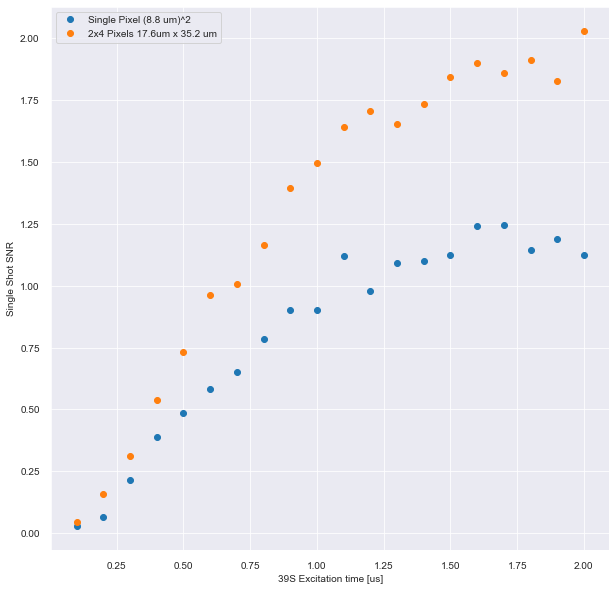

In [37]:
plt.plot(np.linspace(0.1,2,20),snrlist1,linestyle='',marker='o',label="Single Pixel (8.8 um)^2 ")
plt.plot(np.linspace(0.1,2,20),snrlist,linestyle='',marker='o',label="2x4 Pixels 17.6um x 35.2 um")
plt.xlabel("39S Excitation time [us]")
plt.ylabel('Single Shot SNR')
plt.legend()
plt.savefig('/Users/qd/Desktop/DATA/SNR.png')
plt.show()